In [1]:
# Taylor Hurt
# https://www.kaggle.com/mishra5001/credit-card?select=application_data.csv 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as sk

# git add -A
# git commit -m ''
# git push

In [2]:
# create pandas dataframe
CCData = pd.read_csv('application_data.csv')

# drop irrelevant attributes
CCData.drop(columns=['FLAG_MOBIL',
                           'FLAG_EMP_PHONE',
                           'FLAG_WORK_PHONE',
                           'FLAG_CONT_MOBILE',
                           'FLAG_PHONE',
                            'FLAG_EMAIL','CODE_GENDER','SK_ID_CURR'],inplace=True)

# drop more irrelevant attributes about where the applicant lives
MODE_cols = [col for col in CCData.columns if '_MODE' in col]
CCData.drop(columns = MODE_cols,inplace=True)
MEDI_cols = [col for col in CCData.columns if '_MEDI' in col]
CCData.drop(columns = MEDI_cols,inplace=True)
AVG_cols = [col for col in CCData.columns if '_AVG' in col]
CCData.drop(columns = AVG_cols,inplace=True)

# drop binary flag_documents colums [do not know which documents these are and is a redundant attribute]
flag_docs = [col for col in CCData.columns if 'FLAG_DOCUMENT_' in col]
CCData.drop(columns=flag_docs, inplace=True)

# change negative values to absolute values 
CCData['DAYS_BIRTH'] = abs(CCData['DAYS_BIRTH'])
CCData['DAYS_ID_PUBLISH'] = abs(CCData['DAYS_ID_PUBLISH'])
CCData['DAYS_EMPLOYED'] = abs(CCData['DAYS_EMPLOYED'])
CCData['DAYS_REGISTRATION'] = abs(CCData['DAYS_REGISTRATION'])

In [3]:
# view columns with null values 
col_with_nullvalues=CCData.isnull().sum()/len(CCData)*100
col_with_nullvalues.sort_values(ascending=False)

OWN_CAR_AGE                    65.990810
EXT_SOURCE_1                   56.381073
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
REG_REGION_NOT_WORK_REGION      0.000000
ORGANIZATION_TYPE               0.000000
LIVE_CITY_NOT_WORK_CITY         0.000000
REG_CITY_NOT_WORK_CITY          0.000000
REG_CITY_NOT_LIV

In [4]:
# drop columns where null percent is >= 30%
col_with_nullvalues = list(col_with_nullvalues[col_with_nullvalues.values>=30.0].index)
CCData.drop(labels=col_with_nullvalues,axis=1,inplace=True)

In [5]:
# select only float64 data types
cols_float64 = CCData.select_dtypes('float64')
# select the float64 column names only
cols_float64list = cols_float64.columns.tolist()

# select only int64 data types
cols_int64 = CCData.select_dtypes(include='int64')
# select the float64 column names only
cols_int64list = cols_int64.columns.tolist()

# select only object data types
cols_object = CCData.select_dtypes(include='object')
# select the object column names only
cols_objectlist = cols_object.columns.tolist()

cols_float64 = cols_float64list
cols_int64 = cols_int64list
cols_object = cols_objectlist

# create float64 DF
CCData_float64 = CCData[cols_float64]
# create int64 DF
CCData_int64 = CCData[cols_int64]
# create object DF
CCData_object = CCData[cols_object]

In [6]:
# Fill float 64 null values with mean
CCData_float64_fill = CCData_float64.fillna(value = CCData_float64.mean())
print(f'Float64 null count:{CCData_float64_fill.isnull().sum().sum()}')

print(f'int64 null count:{CCData_int64.isnull().sum().sum()}\n')

# combine the three dataframes
CCData_combined = pd.concat([CCData_float64_fill, CCData_object, CCData_int64],axis=1)

# Drop remaining rows with null values
CCData_no_missing = CCData_combined.dropna()

# view DataFrame
(CCData_no_missing.info())

Float64 null count:0
int64 null count:0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306219 entries, 0 to 307510
Data columns (total 44 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   AMT_INCOME_TOTAL             306219 non-null  float64
 1   AMT_CREDIT                   306219 non-null  float64
 2   AMT_ANNUITY                  306219 non-null  float64
 3   AMT_GOODS_PRICE              306219 non-null  float64
 4   REGION_POPULATION_RELATIVE   306219 non-null  float64
 5   DAYS_REGISTRATION            306219 non-null  float64
 6   CNT_FAM_MEMBERS              306219 non-null  float64
 7   EXT_SOURCE_2                 306219 non-null  float64
 8   EXT_SOURCE_3                 306219 non-null  float64
 9   OBS_30_CNT_SOCIAL_CIRCLE     306219 non-null  float64
 10  DEF_30_CNT_SOCIAL_CIRCLE     306219 non-null  float64
 11  OBS_60_CNT_SOCIAL_CIRCLE     306219 non-null  float64
 12  DEF_60_CNT_SOCIAL

In [7]:
# create dummy variablies form CCData_clean
dummy = pd.get_dummies(CCData_no_missing.select_dtypes('object'))

# combine the dummy variables with CCData_clean
CCData_concat = pd.concat([CCData_no_missing, dummy], axis=1)

# drop object datatypes for numerical Data Frame
CCData_numerical = CCData_concat.select_dtypes(exclude='object')

CCData_numerical.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,202500.0,406597.5,24700.5,351000.0,0.018801,3648.0,1.0,0.262949,0.139376,2.0,...,0,0,0,0,0,0,0,0,0,0
1,270000.0,1293502.5,35698.5,1129500.0,0.003541,1186.0,2.0,0.622246,0.510853,1.0,...,0,0,0,0,0,0,0,0,0,0
2,67500.0,135000.0,6750.0,135000.0,0.010032,4260.0,1.0,0.555912,0.729567,0.0,...,0,0,0,0,0,0,0,0,0,0
3,135000.0,312682.5,29686.5,297000.0,0.008019,9833.0,2.0,0.650442,0.510853,2.0,...,0,0,0,0,0,0,0,0,0,0
4,121500.0,513000.0,21865.5,513000.0,0.028663,4311.0,1.0,0.322738,0.510853,0.0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# import seaborn and matplotlib
import seaborn as sn
import matplotlib.pyplot as plt 

# Create a correlation matrix to detect highly correlelated predictor variables
corrMatrix= CCData_numerical.corr().abs()

# select upper traingle of correlation matrix

upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# identify correlatons greater than abs(.8)

to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# drop columns with greater than .8 correlation
CCData_numerical = CCData_numerical.drop(CCData_numerical[to_drop], axis=1)

In [9]:
# https://www.pluralsight.com/guides/machine-learning-neural-networks-scikit-learn 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# DECLARE X AND Y variables
y= CCData_numerical['TARGET']
x = CCData_numerical.drop(['TARGET'], axis=1)

# scale the x variables
x_scaled = pd.DataFrame(preprocessing.scale(x))

# split data for training and testing 80/20, random state = 25 for fixed shuffling of the 80/20 split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size = .2, random_state = 25)

print(f'Training: {X_train.shape}')
print(f'Testing: {X_test.shape}')

Training: (244975, 121)
Testing: (61244, 121)


In [10]:
# import neural netowrk from sklearn
from sklearn.neural_network import MLPClassifier, MLPRegressor

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [12]:
# evaluate the performance of the test data for neural network
from sklearn.metrics import classification_report,confusion_matrix
print(f'Neural Network Performance\n')
print(confusion_matrix(y_test, predict_test))
print(classification_report(y_test, predict_test))

Neural Network Performance

[[56243     0]
 [ 5001     0]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56243
           1       0.00      0.00      0.00      5001

    accuracy                           0.92     61244
   macro avg       0.46      0.50      0.48     61244
weighted avg       0.84      0.92      0.88     61244



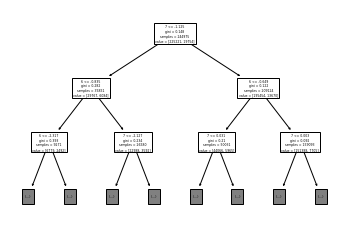

In [13]:
# create a decission tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=10)
clf = clf.fit(X_train,y_train)
clf.score(X_test,y_test)

tree.plot_tree(clf,max_depth=2,feature_names=x_scaled.columns)

predict_train_DT = clf.predict(X_train)
predict_test_DT = clf.predict(X_test)

In [14]:
# Decision Tree testing data
from sklearn.metrics import classification_report,confusion_matrix
print('Decision Tree Performance')
print(confusion_matrix(y_test, predict_test_DT))
print(classification_report(y_test,predict_test_DT))

Decision Tree Performance
[[51396  4847]
 [ 4195   806]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     56243
           1       0.14      0.16      0.15      5001

    accuracy                           0.85     61244
   macro avg       0.53      0.54      0.54     61244
weighted avg       0.86      0.85      0.86     61244



In [15]:
# SMOTE - synthetic minority oversampling technique
from imblearn.over_sampling import SMOTE
method = SMOTE(random_state=2)

x_resampled, y_resampled = method.fit_resample(x_scaled,y)

In [16]:
from sklearn.model_selection import train_test_split

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(x_resampled,y_resampled, test_size = .2, random_state = 25)

print('SMOTE')
print(X_train_r.shape)
print(f'{X_test_r.shape}\n')
print('Normal')
print(X_train.shape)
print(X_test.shape)

SMOTE
(450342, 121)
(112586, 121)

Normal
(244975, 121)
(61244, 121)


In [17]:
# import neural netowrk from sklearn
from sklearn.neural_network import MLPClassifier, MLPRegressor

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_r,y_train_r)

predict_train_r = mlp.predict(X_train_r)
predict_test_r = mlp.predict(X_test_r)

# evaluate the performance of the testing data
print('SMOTE Neural Network Performance')
print(confusion_matrix(y_test_r, predict_test_r))
print(classification_report(y_test_r, predict_test_r))

SMOTE Neural Network Performance
[[41539 14861]
 [11702 44484]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76     56400
           1       0.75      0.79      0.77     56186

    accuracy                           0.76    112586
   macro avg       0.76      0.76      0.76    112586
weighted avg       0.76      0.76      0.76    112586



SMOTE Decision Tree Performance

[[50204  6196]
 [ 5128 51058]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     56400
           1       0.89      0.91      0.90     56186

    accuracy                           0.90    112586
   macro avg       0.90      0.90      0.90    112586
weighted avg       0.90      0.90      0.90    112586



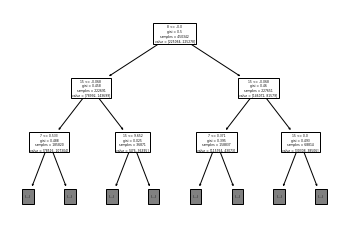

In [30]:
# Apply SMOTE to Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=10)
clf = clf.fit(X_train_r,y_train_r)
clf.score(X_test_r,y_test_r)

tree.plot_tree(clf,max_depth=2,feature_names=x_scaled.columns)

predict_train_DT = clf.predict(X_train_r)
predict_test_DT = clf.predict(X_test_r)

# evaluate the performance of the testing data
print('SMOTE Decision Tree Performance\n')
print(confusion_matrix(y_test_r, predict_test_DT))
print(classification_report(y_test_r, predict_test_DT))

In [28]:
print('non-SMOTE')
print(f'{pd.value_counts(pd.Series(y))}\n')

print('SMOTE')
print(f'{pd.value_counts(pd.Series(y_resampled))}\n')


non-SMOTE
0    281464
1     24755
Name: TARGET, dtype: int64

SMOTE
1    281464
0    281464
Name: TARGET, dtype: int64

